<a href="https://colab.research.google.com/github/sairam2000/Transfer-learning-example-/blob/master/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the Data

In [6]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
        -O /tmp/cats_and_dogs_filtered.zip

--2020-05-12 04:48:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   106MB/s    in 0.6s    

2020-05-12 04:48:19 (106 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



# Downloading the weights

In [7]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-05-12 04:48:24--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   139MB/s    in 0.6s    

2020-05-12 04:48:24 (139 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



# Modelling

In [0]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
loacal_weights = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(include_top=False,weights=None,input_shape=(150,150,3))

In [10]:
pre_trained_model.load_weights(loacal_weights)
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [0]:
last_layer = pre_trained_model.get_layer('mixed10')
last_output = last_layer.output

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable=False

In [13]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [0]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)

In [15]:
model = tf.keras.Model(pre_trained_model.input,x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
import zipfile,os

In [0]:
local_file = '/tmp/cats_and_dogs_filtered.zip'
zipref = zipfile.ZipFile(local_file,mode='r')
zipref.extractall('/tmp/cats_and_dogs_filtered')
zipref.close()

In [0]:
train_path = '/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered/train'
valid_path = '/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered/validation'

In [20]:
print(len(os.listdir(os.path.join(train_path,'cats'))))
print(len(os.listdir(os.path.join(train_path,'dogs'))))
print(len(os.listdir(os.path.join(valid_path,'cats'))))
print(len(os.listdir(os.path.join(valid_path,'dogs'))))

1000
1000
500
500


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1/255.0)

In [23]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(150,150),
                                                    class_mode='binary',
                                                    batch_size=20)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                    target_size=(150,150),
                                                    class_mode='binary',
                                                    batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              verbose=1,
                              validation_data=valid_generator,
                              validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 19s 185ms/step - loss: 10.3729 - accuracy: 0.8220 - val_loss: 0.6866 - val_accuracy: 0.9300
Epoch 2/20
100/100 [==============================] - 17s 172ms/step - loss: 0.8050 - accuracy: 0.8695 - val_loss: 0.1682 - val_accuracy: 0.9570
Epoch 3/20
100/100 [==============================] - 17s 172ms/step - loss: 0.4657 - accuracy: 0.8920 - val_loss: 0.7709 - val_accuracy: 0.8090
Epoch 4/20
100/100 [==============================] - 17s 172ms/step - loss: 0.5361 - accuracy: 0.8815 - val_loss: 0.4484 - val_accuracy: 0.9000
Epoch 5/20
100/100 [==============================] - 17s 171ms/step - loss: 0.5834 - accuracy: 0.8960 - val_loss: 0.3303 - val_accuracy: 0.9240
Epoch 6/20
100/100 [==============================] - 17s 172ms/step - loss: 0.3574 - accuracy: 0.9065 - val_loss: 0.1269 - val_accuracy: 0.9520
Epoch 7/20
100/100 [==============================] -

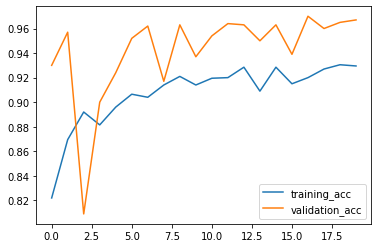

In [28]:
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
train_loss = history.history['loss']
valid_acc = history.history["val_accuracy"]
valid_loss = history.history["val_loss"]
epochs = range(len(train_acc))
plt.plot(epochs,train_acc,label='training_acc')
plt.plot(epochs,valid_acc,label='validation_acc')
plt.legend()

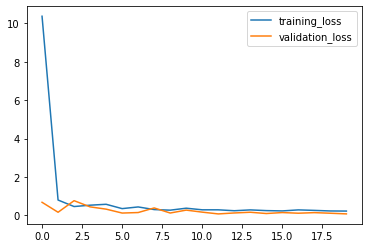

In [29]:
plt.plot(epochs,train_loss,label='training_loss')
plt.plot(epochs,valid_loss,label='validation_loss')
plt.legend()